In [20]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

EXPENSES

In [21]:
# reading in data
df = pd.read_excel("currentexpense2324.xlsx")
df.head()

,CO,CDS,District,EDP 365,Current\nExpense ADA,Current\nExpense per ADA,LEA Type
0,1,61119,Alameda Unified,1.550948e+08,8567.86,18101.93,Unified
1,1,61127,Albany City Unified,6.149090e+07,3435.41,17899.14,Unified
2,1,61143,Berkeley Unified,2.205508e+08,8572.17,25728.70,Unified
3,1,61150,Castro Valley Unified,1.424913e+08,8991.52,15847.30,Unified
4,1,61168,Emery Unified,1.586300e+07,554.70,28597.44,Unified


In [22]:
# making conversion dict for County ID values
conversion_df = pd.read_excel('CO-Name.xlsx')
conversion_dict = {}
for i in range(len(conversion_df)):
    conversion_dict[conversion_df['CO'][i]] = conversion_df['County'][i]
conversion_dict

{np.int64(1): 'Alameda',
 np.int64(2): 'Alpine',
 np.int64(3): 'Amador',
 np.int64(4): 'Butte',
 np.int64(5): 'Calaveras',
 np.int64(6): 'Colusa',
 np.int64(7): 'Contra Costa',
 np.int64(8): 'Del Norte',
 np.int64(9): 'El Dorado',
 np.int64(10): 'Fresno',
 np.int64(11): 'Glenn',
 np.int64(12): 'Humboldt',
 np.int64(13): 'Imperial',
 np.int64(14): 'Inyo',
 np.int64(15): 'Kern',
 np.int64(16): 'Kings',
 np.int64(17): 'Lake',
 np.int64(18): 'Lassen',
 np.int64(19): 'Los Angeles',
 np.int64(20): 'Madera',
 np.int64(21): 'Marin',
 np.int64(22): 'Mariposa',
 np.int64(23): 'Mendocino',
 np.int64(24): 'Merced',
 np.int64(25): 'Modoc',
 np.int64(26): 'Mono',
 np.int64(27): 'Monterey',
 np.int64(28): 'Napa',
 np.int64(29): 'Nevada',
 np.int64(30): 'Orange',
 np.int64(31): 'Placer',
 np.int64(32): 'Plumas',
 np.int64(33): 'Riverside',
 np.int64(34): 'Sacramento',
 np.int64(35): 'San Benito',
 np.int64(36): 'San Bernardino',
 np.int64(37): 'San Diego',
 np.int64(38): 'San Francisco',
 np.int64(39)

In [23]:
# cleaning data
df = df.drop(columns=['CDS', 'District', 'EDP 365', 'Current\nExpense ADA', 'LEA Type'])
df = df.rename(columns={'Current\nExpense per ADA' : 'Expense per ADA'})
df['CO'] = df['CO'].map(conversion_dict)
df.head()

,CO,Expense per ADA
0,Alameda,18101.93
1,Alameda,17899.14
2,Alameda,25728.70
3,Alameda,15847.30
4,Alameda,28597.44


In [40]:
df_aggregated = df.groupby('CO').agg('mean')
print(df_aggregated['Expense per ADA'].max())
print(df_aggregated['Expense per ADA'].min())
df_aggregated.head()

59610.76
15659.38


,Expense per ADA
CO,
Alameda,22015.700000
Alpine,59610.760000
Amador,15659.380000
Butte,22534.752308
Calaveras,19967.307500


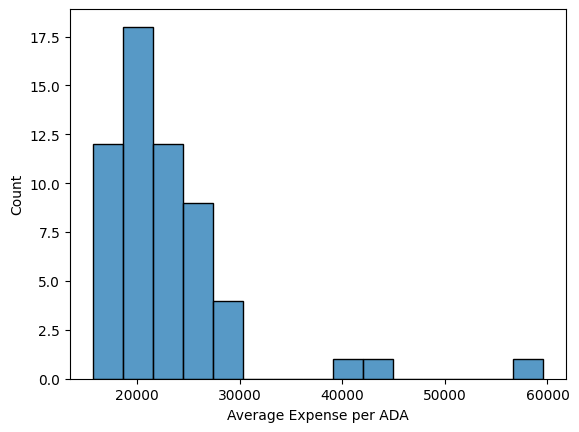

In [39]:
sns.histplot(data=df_aggregated, x='Expense per ADA');
plt.xlabel('Average Expense per ADA');

TEST SCORES

In [26]:
testing_data = pd.read_csv('sb_ca2024_all_csv_v1.txt', delimiter='^', encoding='latin1')
county_info = pd.read_csv('sb_ca2024entities_csv.txt', delimiter='^', encoding='latin1')

In [27]:
# cleaning 
testing_data_short = testing_data[['County Code', 'Mean Scale Score', 'Percentage Standard Met and Above']].replace('*', np.nan).dropna(subset=['Mean Scale Score'])
testing_data_short['Mean Scale Score'] = testing_data_short['Mean Scale Score'].astype(float)
testing_data_short['Percentage Standard Met and Above'] = testing_data_short['Percentage Standard Met and Above'].astype(float)
testing_data_short = testing_data_short.groupby('County Code').agg('mean')
testing_data_short.head()

,Mean Scale Score,Percentage Standard Met and Above
County Code,,
0,2491.557809,39.121612
1,2495.838243,45.370984
3,2462.735317,29.380252
4,2475.203283,34.373734
5,2456.617852,27.033056


In [28]:
new_row = pd.DataFrame([[0, 0]], columns=testing_data_short.columns, index=[2])
testing_data_short = pd.concat([testing_data_short, new_row])
testing_data_short = testing_data_short.sort_index()
testing_data_short.head()

,Mean Scale Score,Percentage Standard Met and Above
0,2491.557809,39.121612
1,2495.838243,45.370984
2,0.000000,0.000000
3,2462.735317,29.380252
4,2475.203283,34.373734


In [29]:
testing_data_short['Test Calculated Value'] = testing_data_short['Mean Scale Score'] * testing_data_short['Percentage Standard Met and Above']
testing_data_short.head()

,Mean Scale Score,Percentage Standard Met and Above,Test Calculated Value
0,2491.557809,39.121612,97473.758088
1,2495.838243,45.370984,113238.637646
2,0.000000,0.000000,0.000000
3,2462.735317,29.380252,72355.783166
4,2475.203283,34.373734,85081.979674


In [30]:
# cleaning county info
county_info_short = county_info[['County Code', 'County Name']].groupby('County Code').agg('first')
county_info_short.head()

,County Name
County Code,
0,State Of California
1,Alameda
2,Alpine
3,Amador
4,Butte


In [31]:
combined_testing_data = county_info_short.merge(testing_data_short, left_index=True, right_index=True)
combined_testing_data.head()

,County Name,Mean Scale Score,Percentage Standard Met and Above,Test Calculated Value
County Code,,,,
0,State Of California,2491.557809,39.121612,97473.758088
1,Alameda,2495.838243,45.370984,113238.637646
2,Alpine,0.000000,0.000000,0.000000
3,Amador,2462.735317,29.380252,72355.783166
4,Butte,2475.203283,34.373734,85081.979674


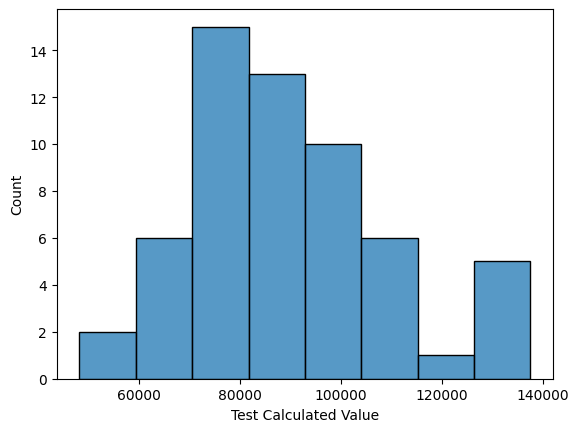

In [32]:
sns.histplot(data=combined_testing_data.drop(index=[2]), x='Test Calculated Value');

Combining test and expense dfs

In [33]:
df_aggregated.head()

,Expense per ADA
CO,
Alameda,22015.700000
Alpine,59610.760000
Amador,15659.380000
Butte,22534.752308
Calaveras,19967.307500


In [34]:
combined_testing_data.head()

,County Name,Mean Scale Score,Percentage Standard Met and Above,Test Calculated Value
County Code,,,,
0,State Of California,2491.557809,39.121612,97473.758088
1,Alameda,2495.838243,45.370984,113238.637646
2,Alpine,0.000000,0.000000,0.000000
3,Amador,2462.735317,29.380252,72355.783166
4,Butte,2475.203283,34.373734,85081.979674


In [35]:
combined_testing_expense = combined_testing_data.merge(df_aggregated, left_on='County Name', right_index=True)
combined_testing_expense.head()

,County Name,Mean Scale Score,Percentage Standard Met and Above,Test Calculated Value,Expense per ADA
County Code,,,,,
1,Alameda,2495.838243,45.370984,113238.637646,22015.700000
2,Alpine,0.000000,0.000000,0.000000,59610.760000
3,Amador,2462.735317,29.380252,72355.783166,15659.380000
4,Butte,2475.203283,34.373734,85081.979674,22534.752308
5,Calaveras,2456.617852,27.033056,66409.887897,19967.307500


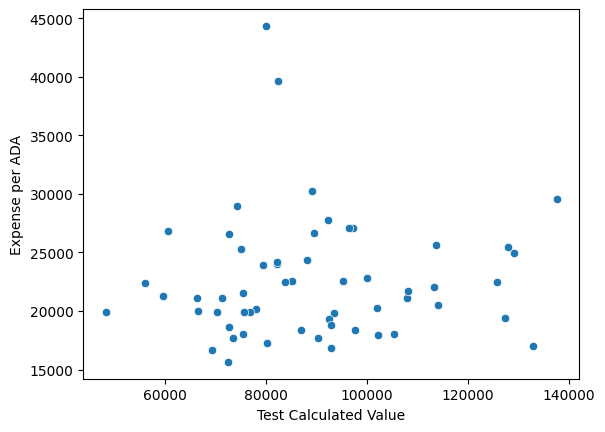

In [36]:
sns.scatterplot(data=combined_testing_expense.drop(index=2), x='Test Calculated Value', y='Expense per ADA');

SAVING CSV

In [37]:
combined_testing_expense.to_csv("final_testing_expense.csv", index=False)